# **Implement K-Means Clustering**

## **Problem Statement**
K-Means Clustering is an unsupervised machine learning algorithm used to partition a dataset into `K` clusters. The algorithm iteratively assigns data points to clusters and updates cluster centroids to minimize intra-cluster variance.

The K-Means objective function is:

$$J = \sum_{i=1}^{m} \min_{k \in {1, ..., K}} ||x_i - \mu_k||^2$$

where:
- $x_i$ represents a data point,
- $\mu_k$ is the centroid of cluster $k$,
- $K$ is the number of clusters,
- The function minimizes the squared Euclidean distance between points and their closest centroids.

---

## **Task**
Implement a `KMeans` class that:
1. Initializes with a **number of clusters (`K`)** and **maximum iterations**.
2. Uses **random initialization** to choose `K` initial centroids.
3. Assigns each data point to the **nearest centroid** using Euclidean distance.
4. Computes new **cluster centroids** as the mean of assigned points.
5. Stops iterating when centroids **converge** (minimal change) or maximum iterations are reached.
6. Returns **cluster labels** for each data point.

---

## **Constraints**
- Use **NumPy** for efficient matrix operations.
- The model should handle datasets of varying sizes.
- Ensure the implementation is **vectorized** for better performance.

---

## **Example Usage**
```python
import numpy as np
from sklearn.datasets import make_blobs

def test_kmeans():
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
    
    model = KMeans(K=3, max_iters=100)
    labels = model.predict(X)
    
    print(f"Cluster Assignments: {labels[:10]}")

test_kmeans()
```


In [39]:
import numpy as np

class KMeans:
    def __init__(self, K: int, max_iters: int):
        self.K = K
        self.max_iters = max_iters

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape[0], X.shape[1]
        
        # initiate centers
        # centers: [[x1, x2], [y1, y2], ....] - size of k
        center_idx = np.random.choice(self.n_samples, self.K, replace=False)
        self.centers = self.X[center_idx]

        # initiate cluster
        # cluster: [[], [], ....] - size of n
        self.cluster = np.zeros(self.n_samples, dtype=int)
                  
        # iterate
        for _ in range(self.max_iters):
            
            ##update cluster labels: assign labels of all points with the closest cluster
            self.cluster = self.update_clusters()
            
            ##update cluster centers: generate new centers of clusters
            prev_centers = self.centers.copy()
            self.centers = self.update_centers()
            
            if self._is_converged(prev_centers, self.centers):
                break

        return self.cluster

    def update_clusters(self):
        for i in range(self.n_samples):
            distances = [self.euclidean_distance(self.X[i], center) for center in self.centers]
            self.cluster[i] = np.argmin(distances)
        return self.cluster

    def update_centers(self):
        for j in range(self.K):
            cluster_lst = self.X[self.cluster == j]
            if len(cluster_lst) > 0:
                self.centers[j] = np.mean(cluster_lst, axis=0)
        return self.centers

    def euclidean_distance(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2))

    def _is_converged(self, centroids_old, centroids):
        distances = [self.euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) < 1e-4

    ########### visualize ################
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        
        for i in range(self.K):
            cluster_points = self.X[self.cluster == i]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
        
        for point in self.centers:
            ax.scatter(*point, marker='x', color='black', linewidth=2, s=100, label='Centroids')
        
        ax.legend()
        plt.title("K-Means Clustering Visualization")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()
        

In [40]:
points = np.array([[1.0, 2.0], [1.5, 1.8], [5.0, 8.0], [8.0, 8.0], [1.0, 0.6], [9.0, 11.0]])
kmeans = KMeans(K=2, max_iters=100)
print(kmeans.predict(points))


[1 1 0 0 1 0]


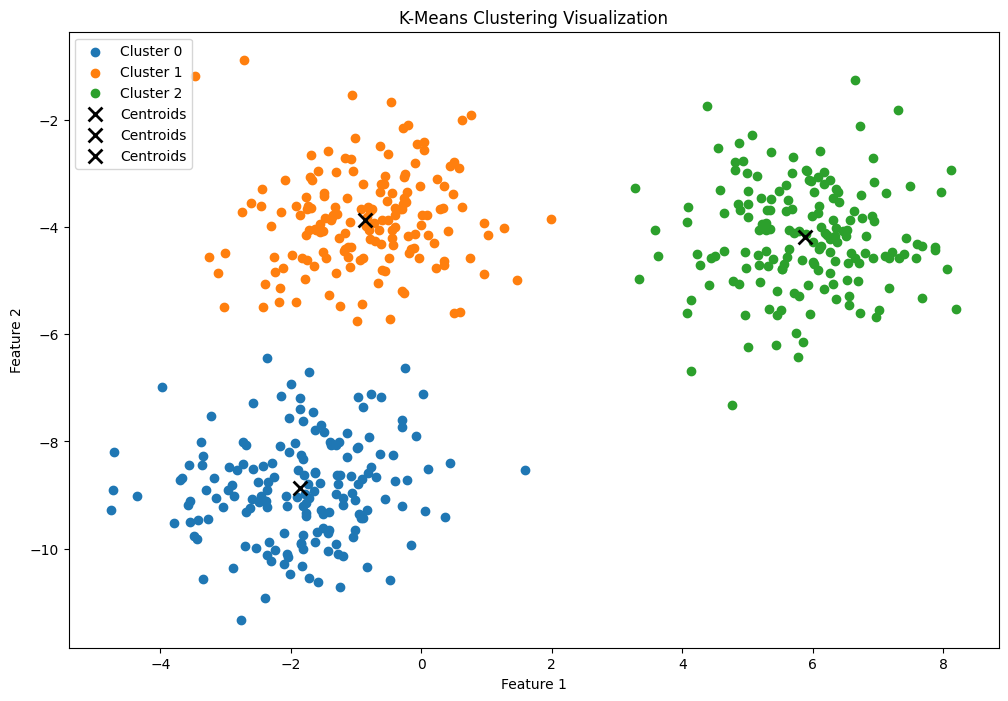

In [42]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def test_kmeans():
    # Generate dataset
    np.random.seed(42)
    X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
    
    # Run KMeans
    kmeans = KMeans(K=3, max_iters=100)
    labels = kmeans.predict(X)
    
    # Visualize Clusters
    kmeans.plot()

test_kmeans()

In [23]:
np.random.seed(42)
from sklearn.datasets import make_blobs

X, y = make_blobs(
    centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

(500, 2)
3
